In [1]:
import smtplib
from matplotlib import style
import seaborn as sns
sns.set(style='ticks', palette='RdBu')
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest
import datetime 
%matplotlib inline
import matplotlib.pyplot as plt
from subprocess import check_output
pd.options.display.max_colwidth = 1000
from time import gmtime, strftime
Time_now = strftime("%Y-%m-%d %H:%M:%S", gmtime())
import timeit
start = timeit.default_timer()
pd.options.display.max_rows = 100
from wordcloud import WordCloud
import sqlite3
import nltk
import string
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')
from sklearn.feature_selection.univariate_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import random
import itertools
import sys
import os
import argparse
from sklearn.pipeline import Pipeline
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
import six
from abc import ABCMeta
from scipy import sparse
from scipy.sparse import issparse
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import check_X_y, check_array
from sklearn.utils.extmath import safe_sparse_dot
from sklearn.preprocessing import normalize, binarize, LabelBinarizer
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV, SelectKBest
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn import svm
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

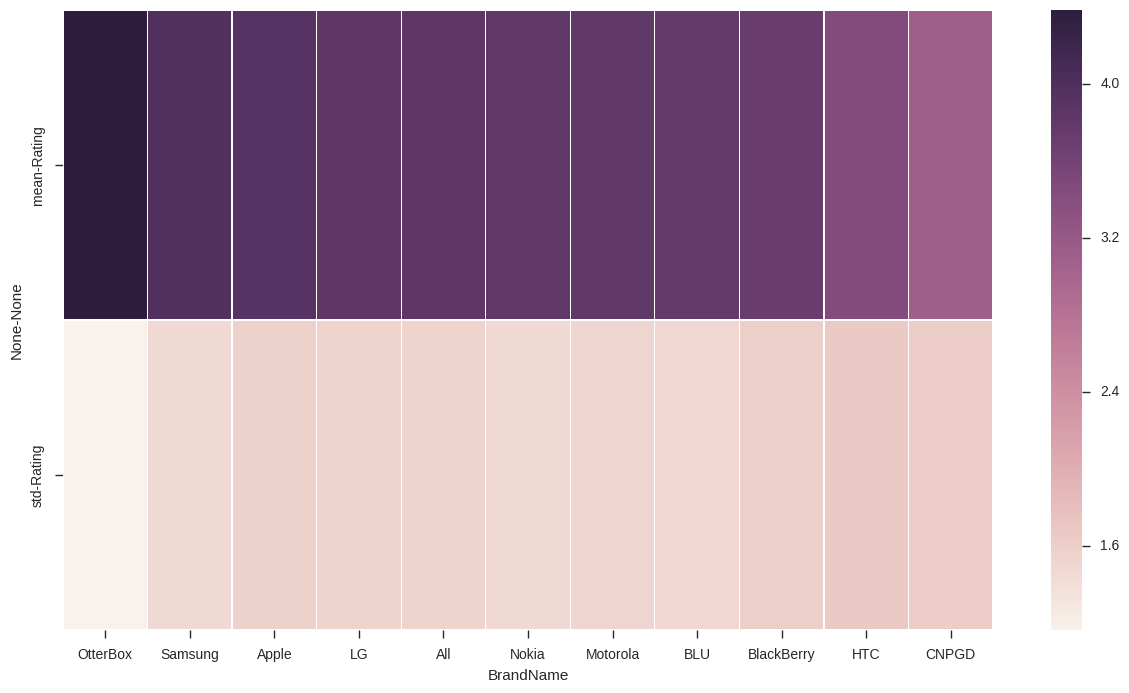

In [2]:
data = pd.read_csv('/home/ishwars/input/Amazon_Unlocked_Mobile.csv', encoding='utf-8')
df = data
df.columns = ['ProductName', 'BrandName', 'Price', 'Rating', 'Reviews', 'ReviewVotes']
df['Price'] = df['Price'].fillna(0)
df['ReviewVotes'] = df['ReviewVotes'].fillna(0)
categorical_features = (data.select_dtypes(include=['object']).columns.values)
numerical_features = data.select_dtypes(include = ['float64', 'int64']).columns.values
pivot = pd.pivot_table(df,
            values = ['Rating', 'ReviewVotes'],
            index = ['BrandName'], 
                       columns= [],
                       aggfunc=[np.sum, np.mean, np.count_nonzero, np.std], 
                       margins=True).fillna('')

pivot = pd.pivot_table(df,
            values = ['Rating', 'ReviewVotes'],
            index =  ['BrandName'],
                       columns= [],
                       aggfunc=[np.sum, np.mean, np.count_nonzero, np.std], 
                       margins=True, fill_value=0).sort_values(by=('count_nonzero', 'Rating'), ascending=False).fillna('')

top_10_brands = pivot.reindex().head(n=11)
top_10_brands = top_10_brands.reset_index()
tt_brand = top_10_brands['BrandName']
tt_brand2 = tt_brand.reset_index()
top_10_brand_list = list(set(tt_brand2['BrandName']))
top_10_brand_list.remove('All')

df_small=df.loc[df['BrandName'].isin(top_10_brand_list)]
pivot = pd.pivot_table(df_small,
            values = ['Rating'],
            index =  ['BrandName'], 
                       columns= [],
                       aggfunc=[np.mean, np.std], 
                       margins=True, fill_value=0).sort_values(by=('mean', 'Rating'), ascending=False).fillna('')
cmap = sns.cubehelix_palette(start = 1.5, rot = 1.5, as_cmap = True)
plt.subplots(figsize = (15, 8))
sns.heatmap(pivot.T,linewidths=0.2,xticklabels=True, yticklabels=True)


In [3]:
df_small.columns.values

array(['ProductName', 'BrandName', 'Price', 'Rating', 'Reviews',
       'ReviewVotes'], dtype=object)

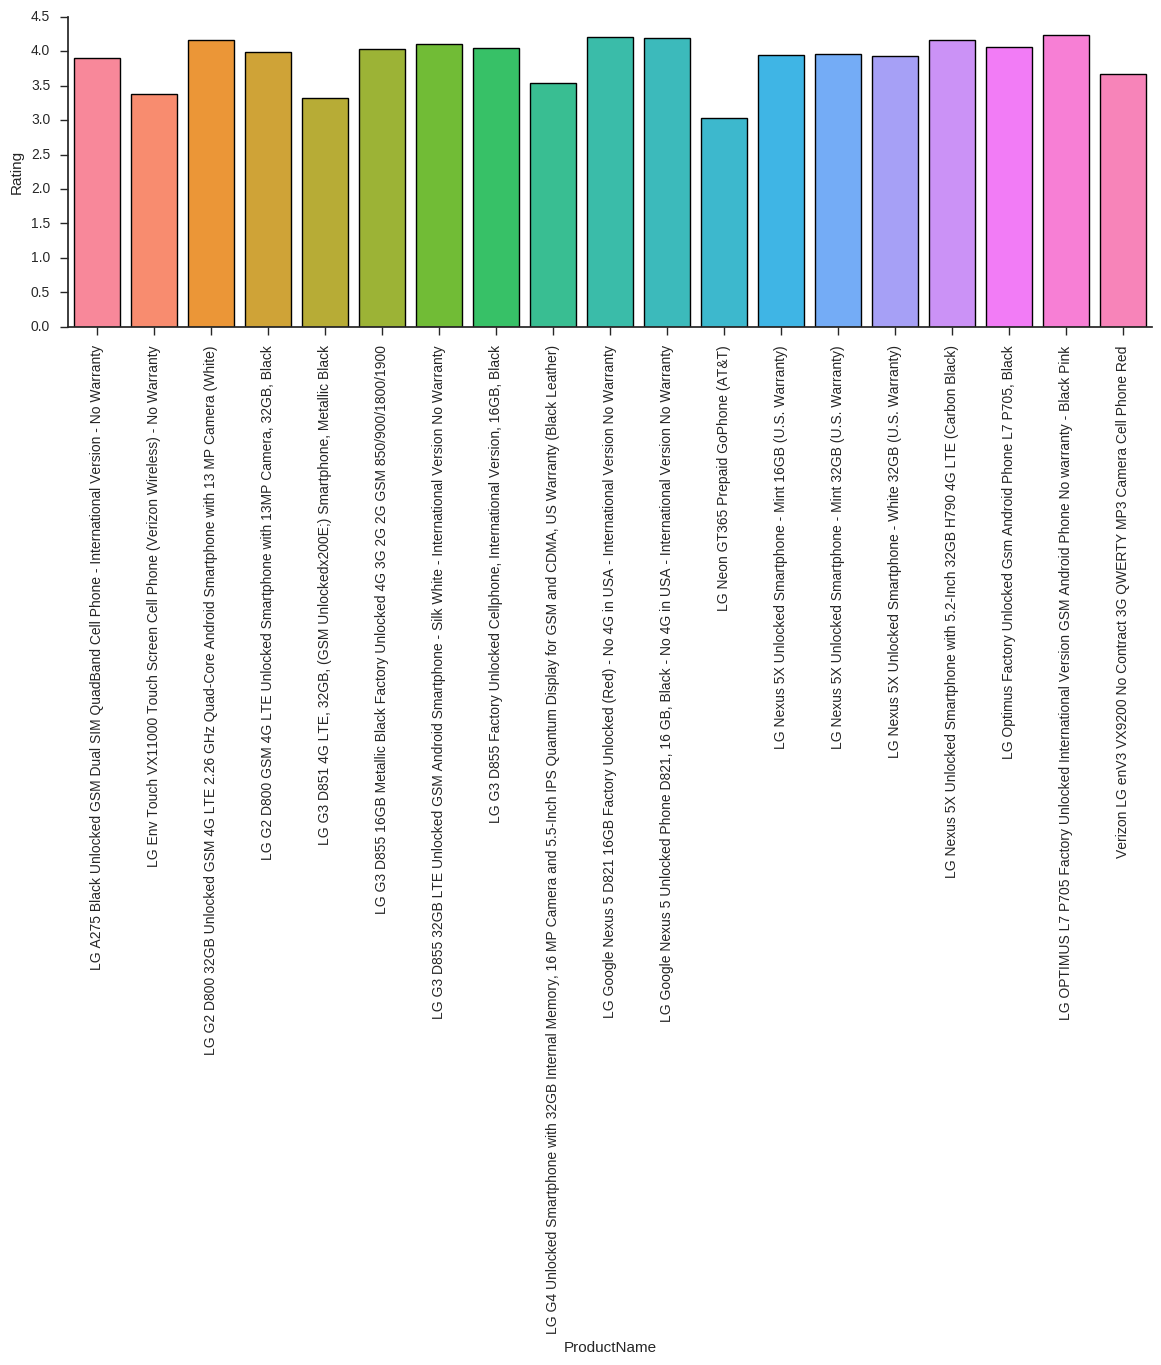

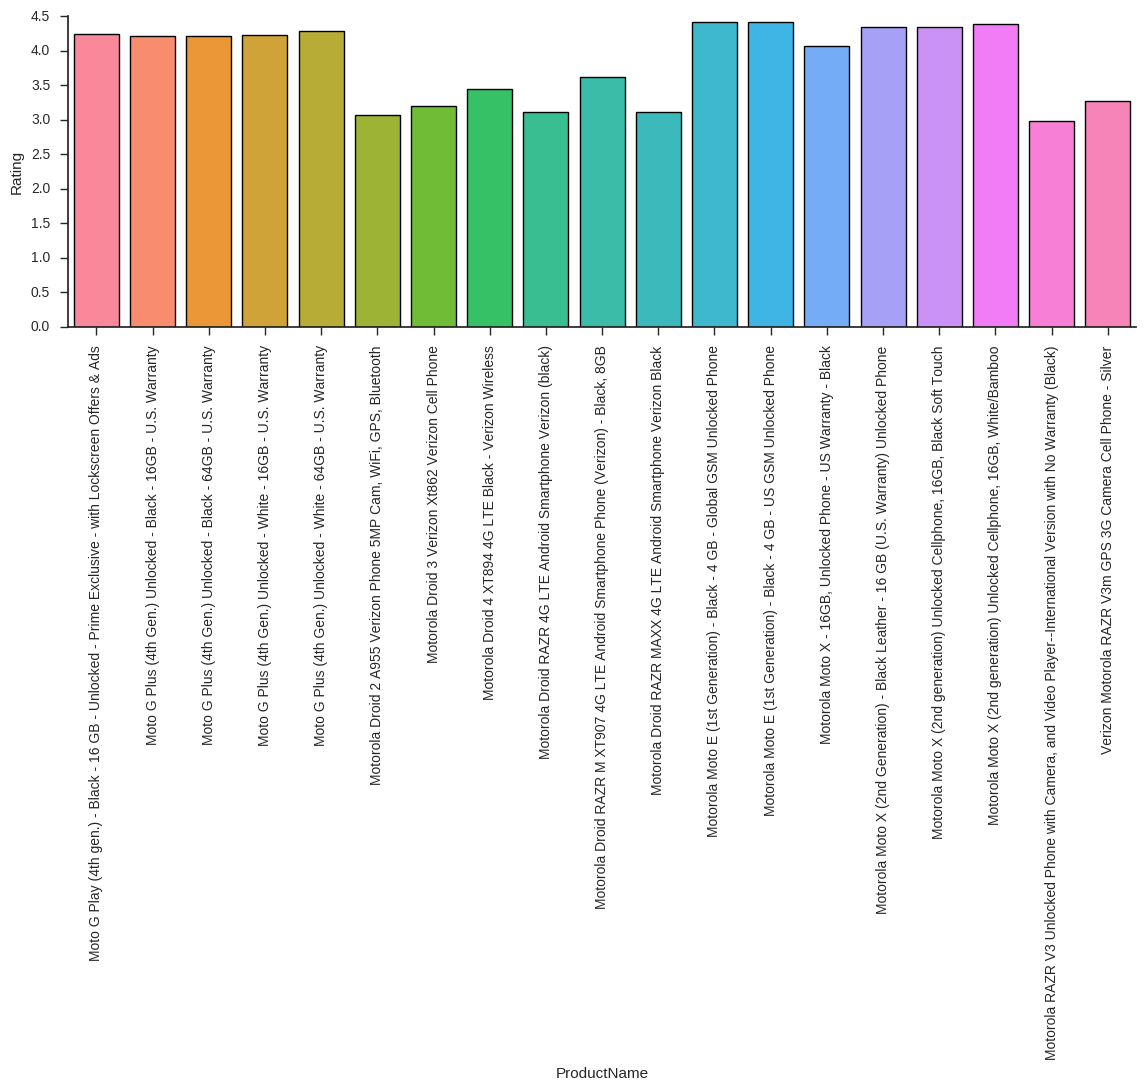

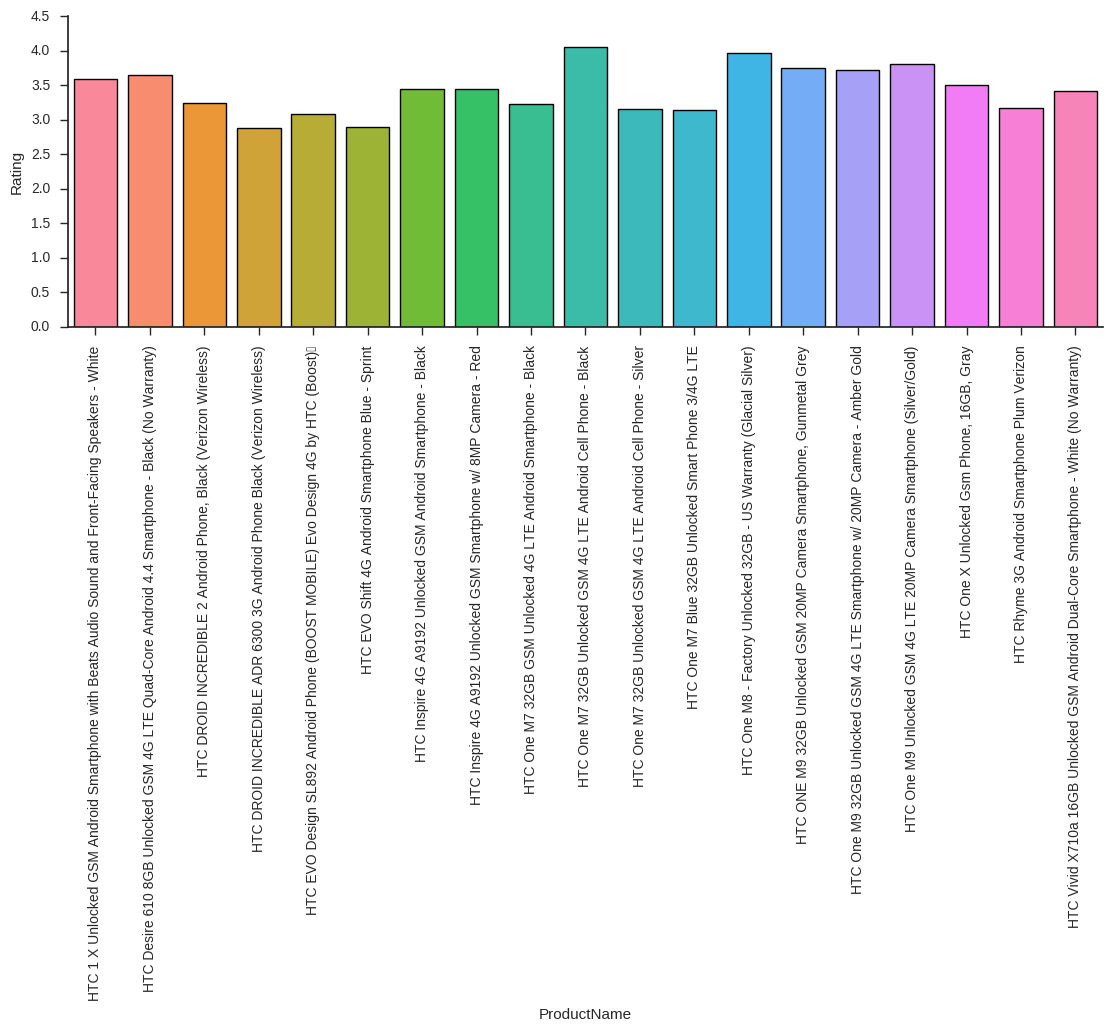

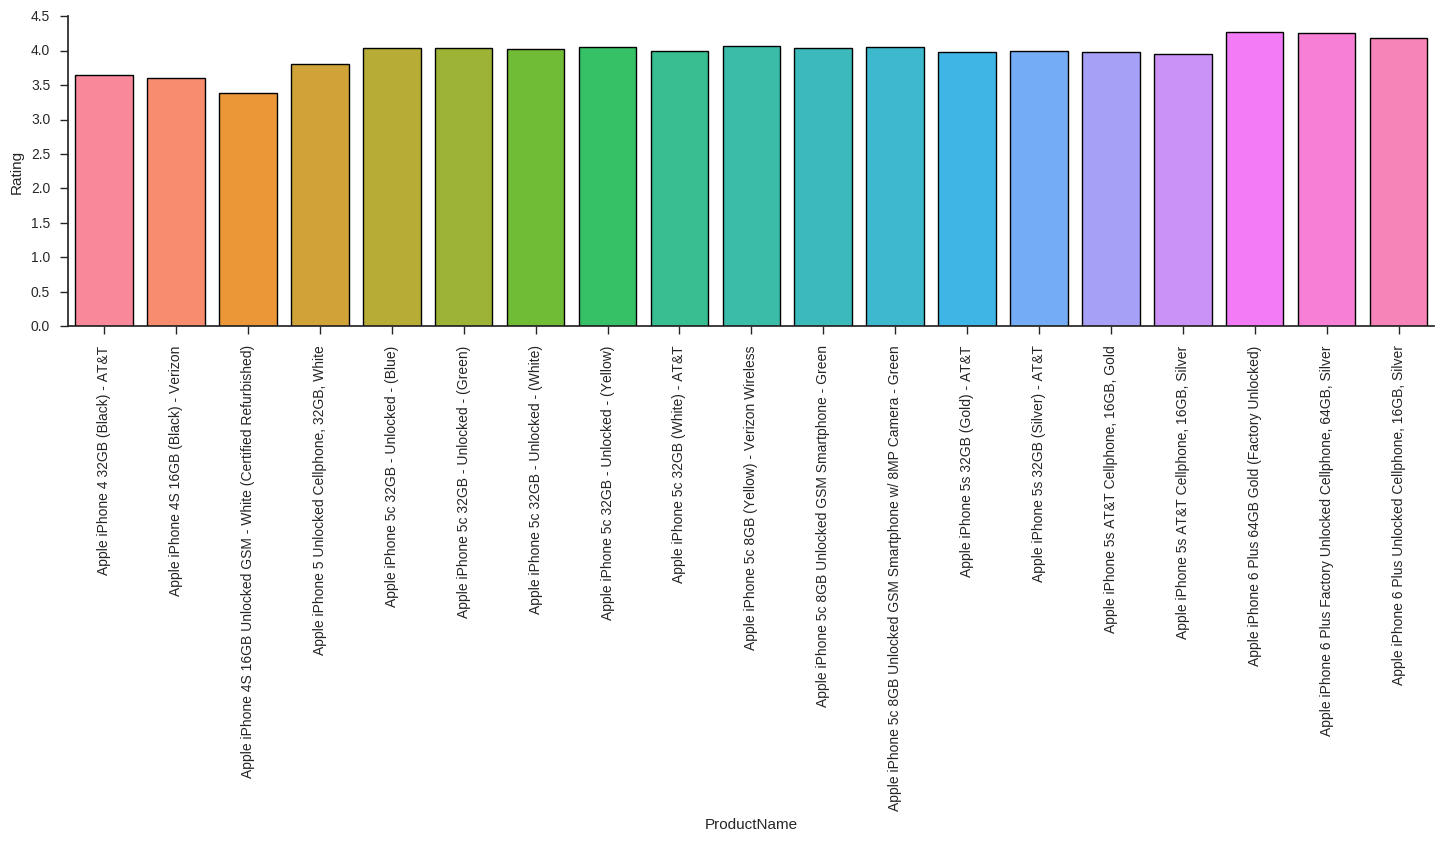

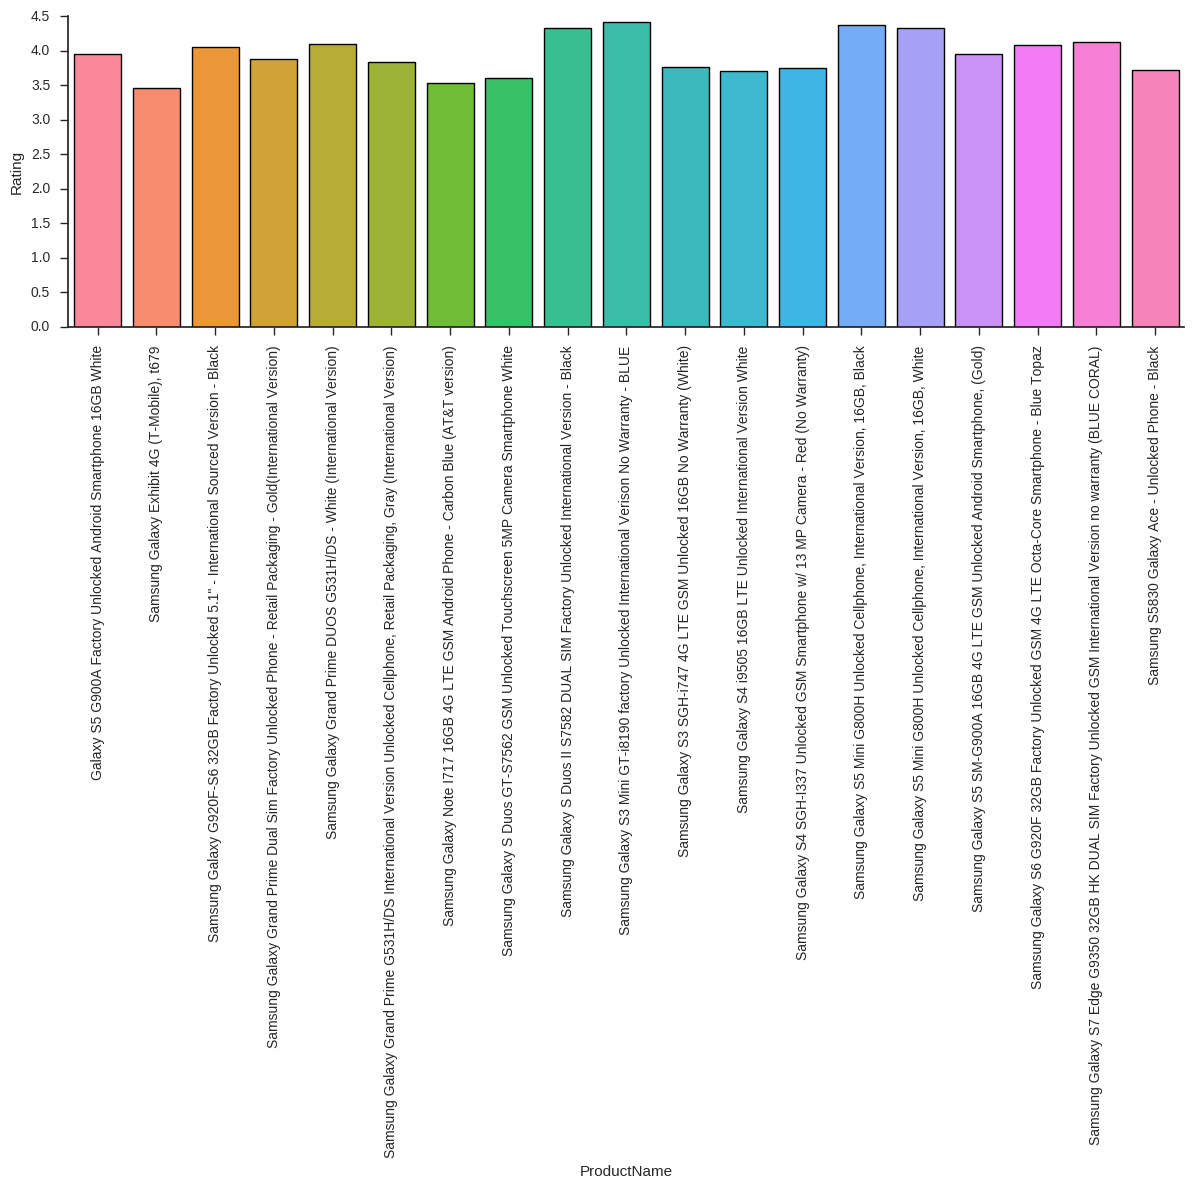

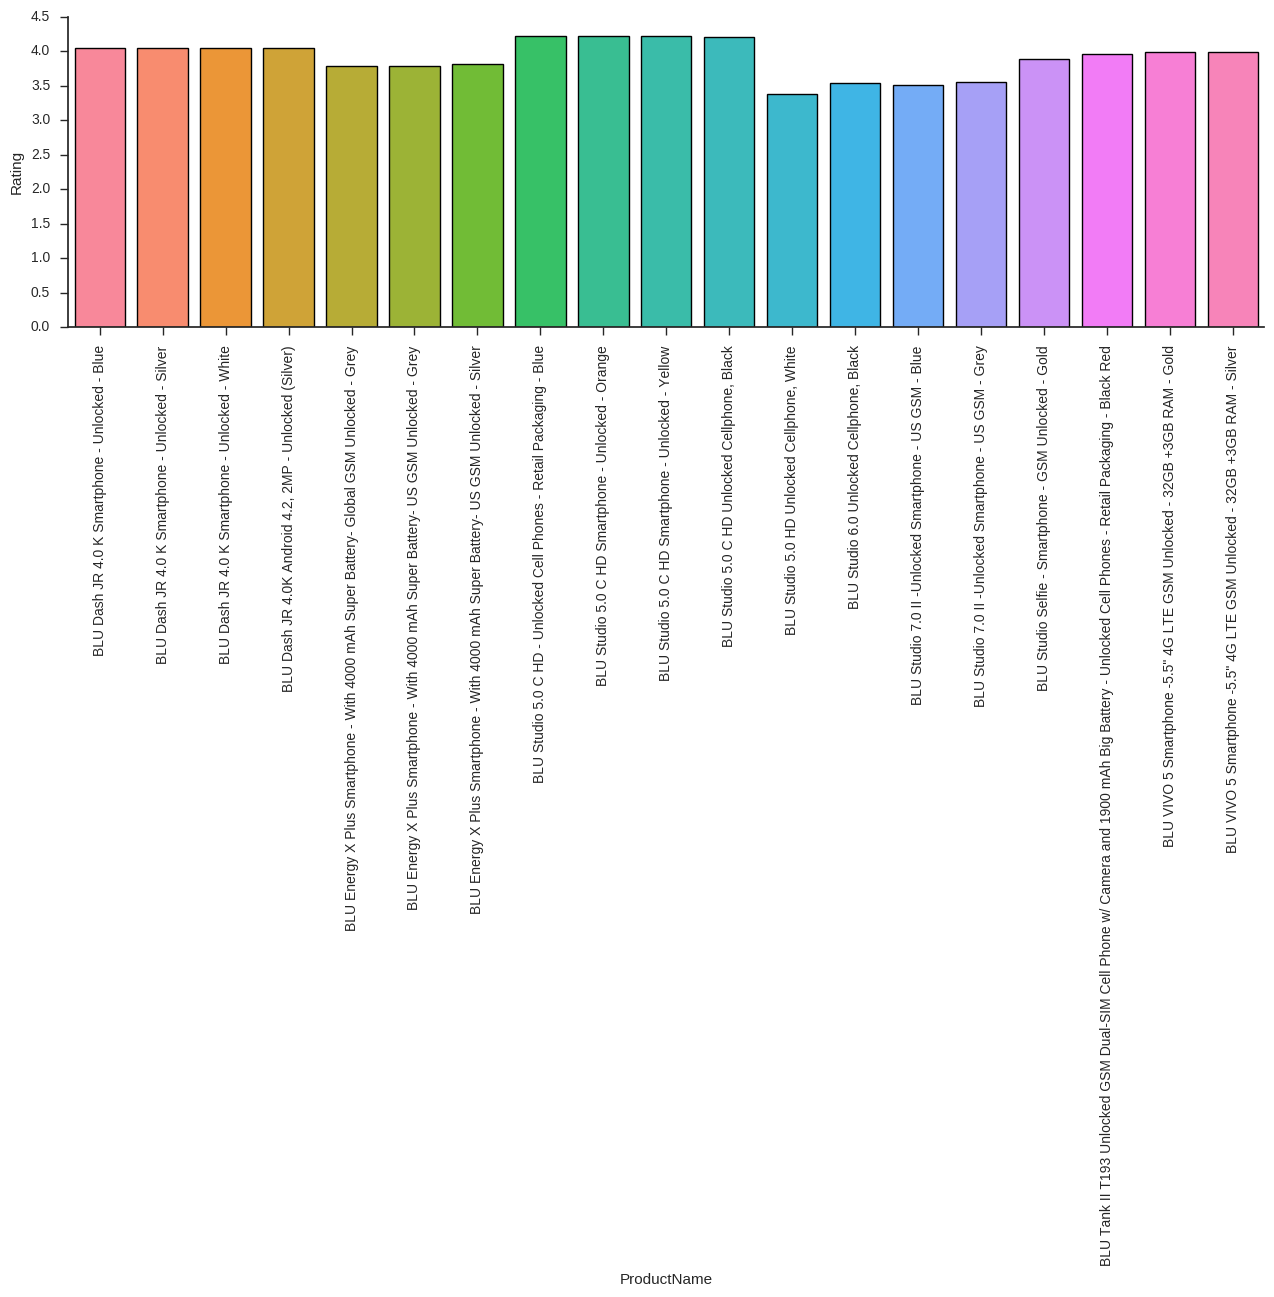

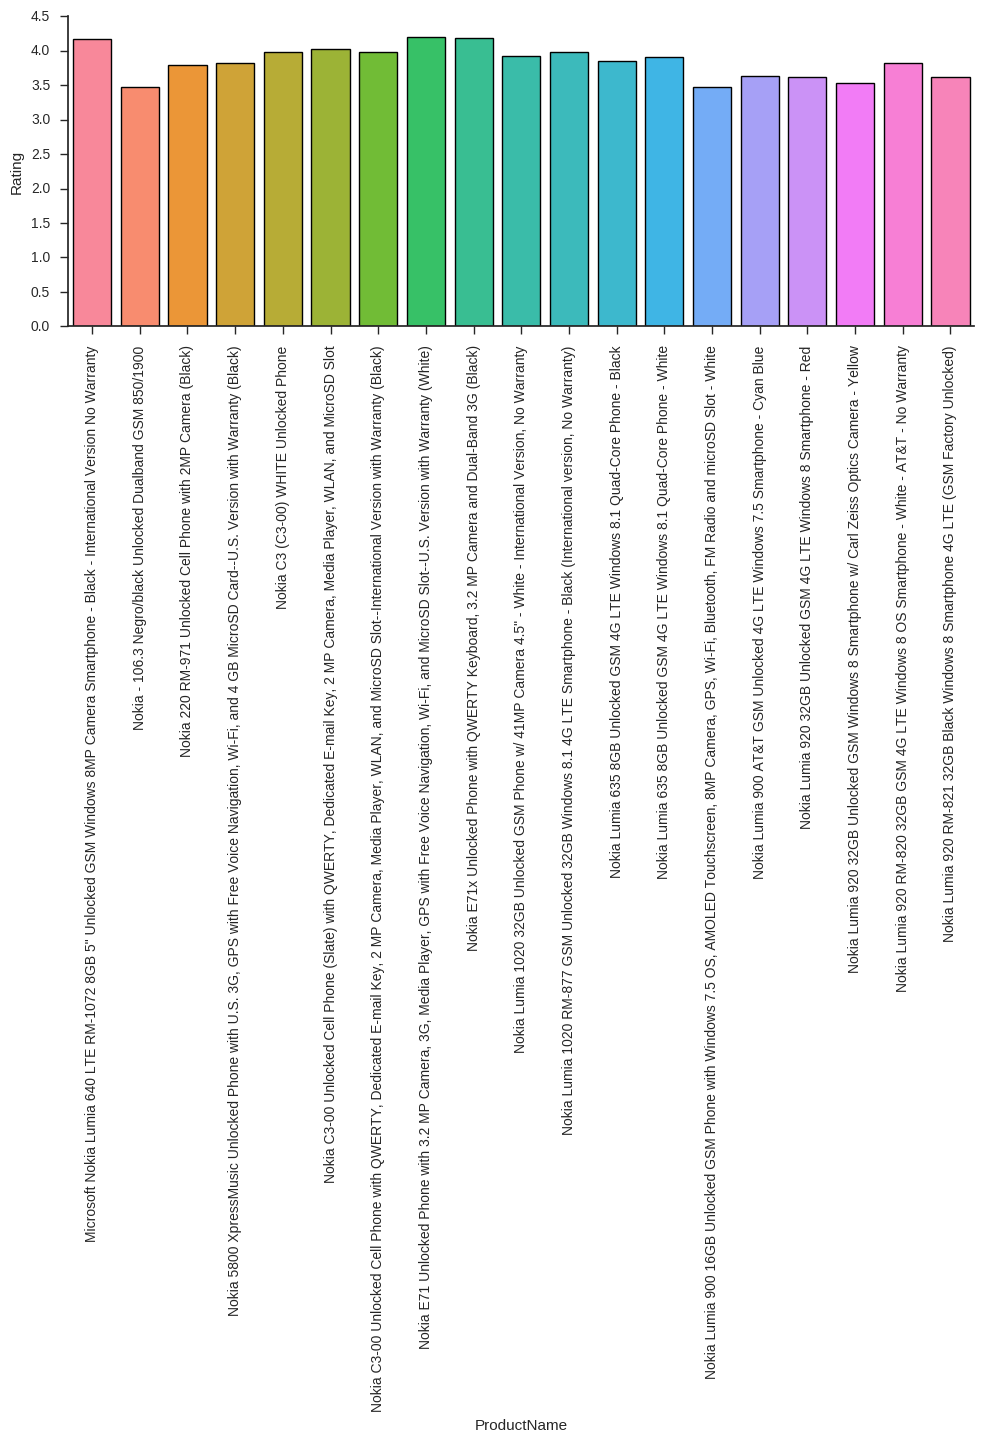

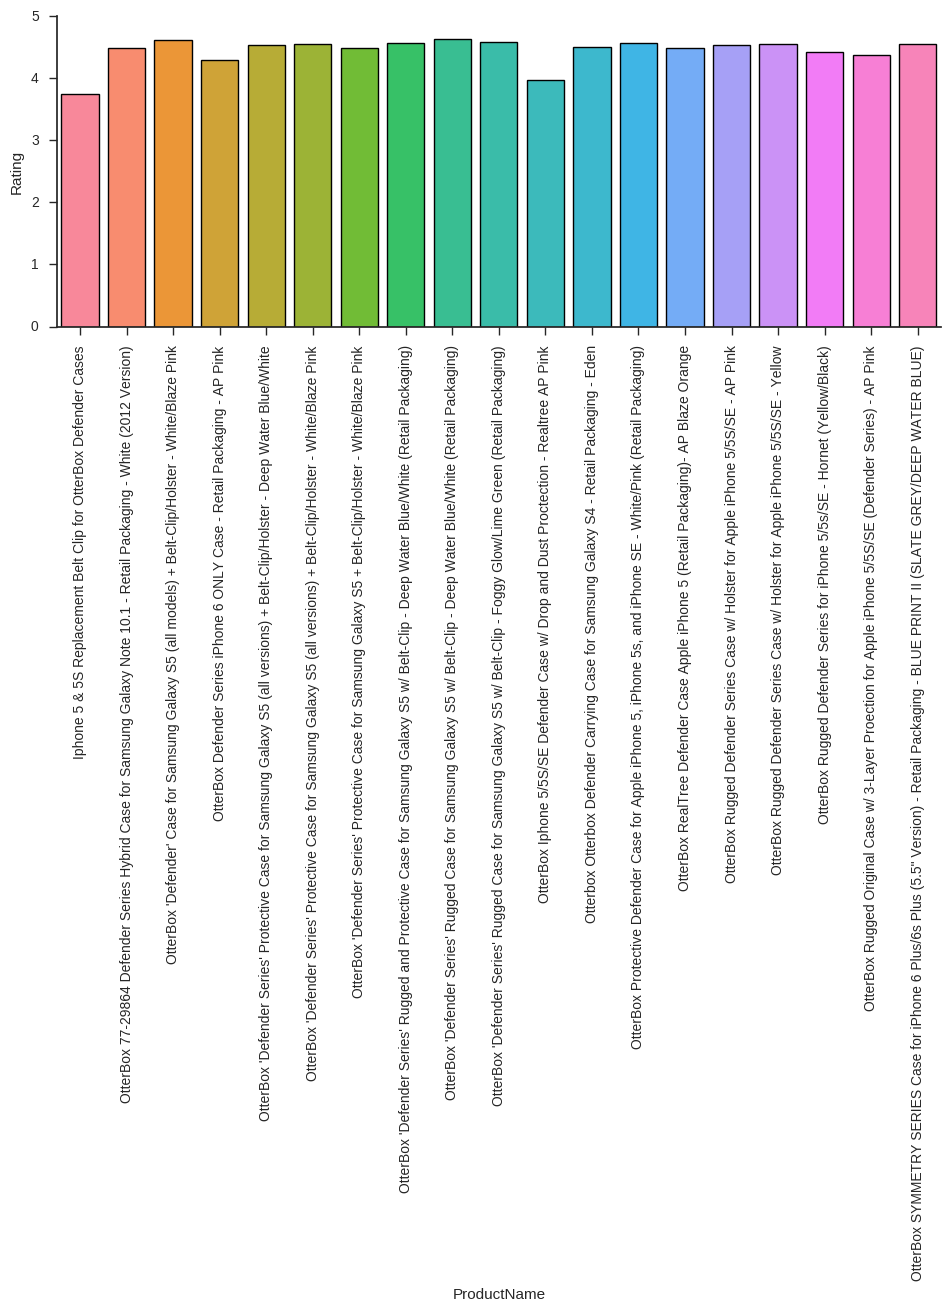

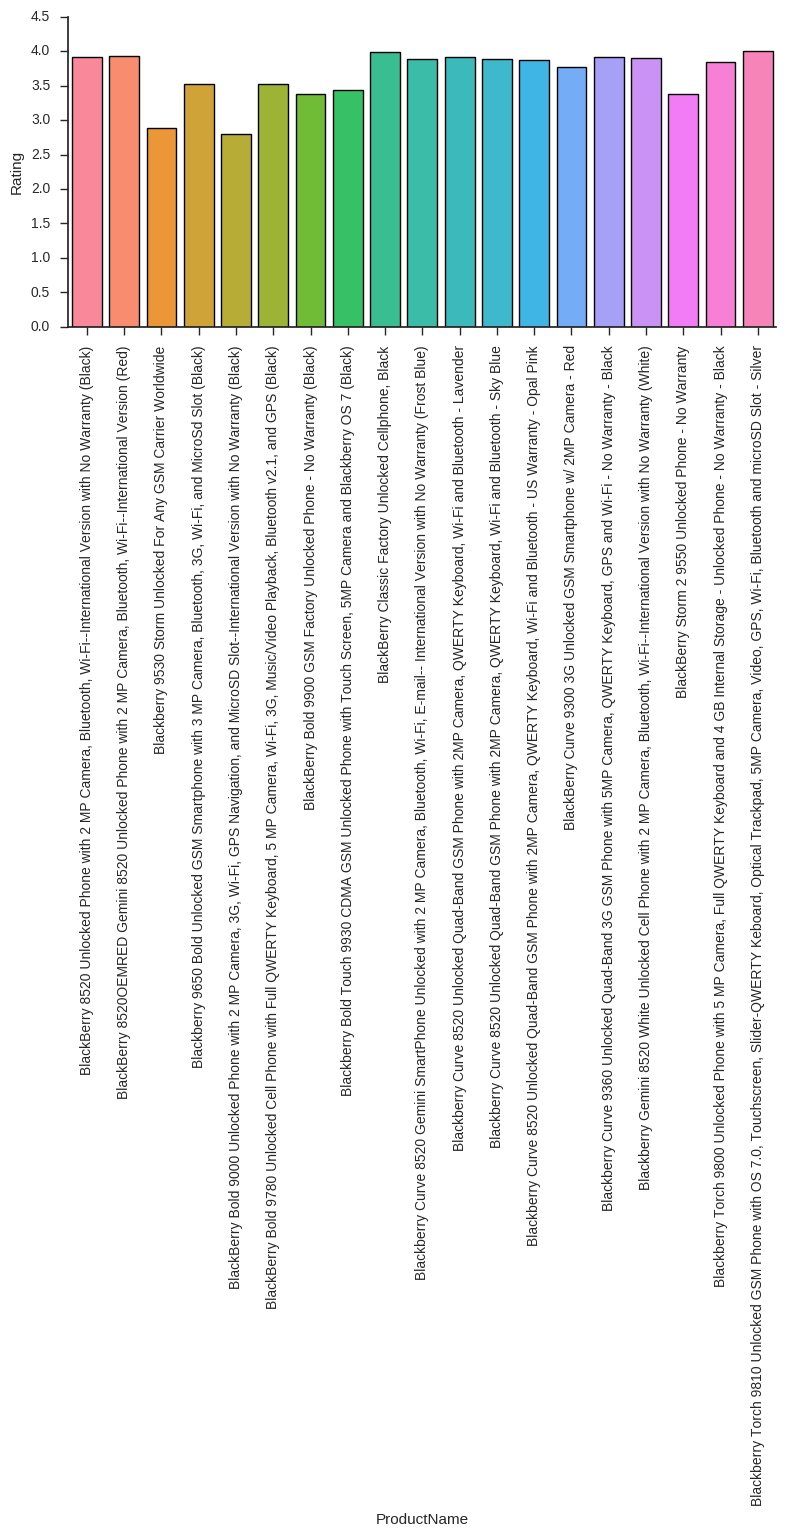

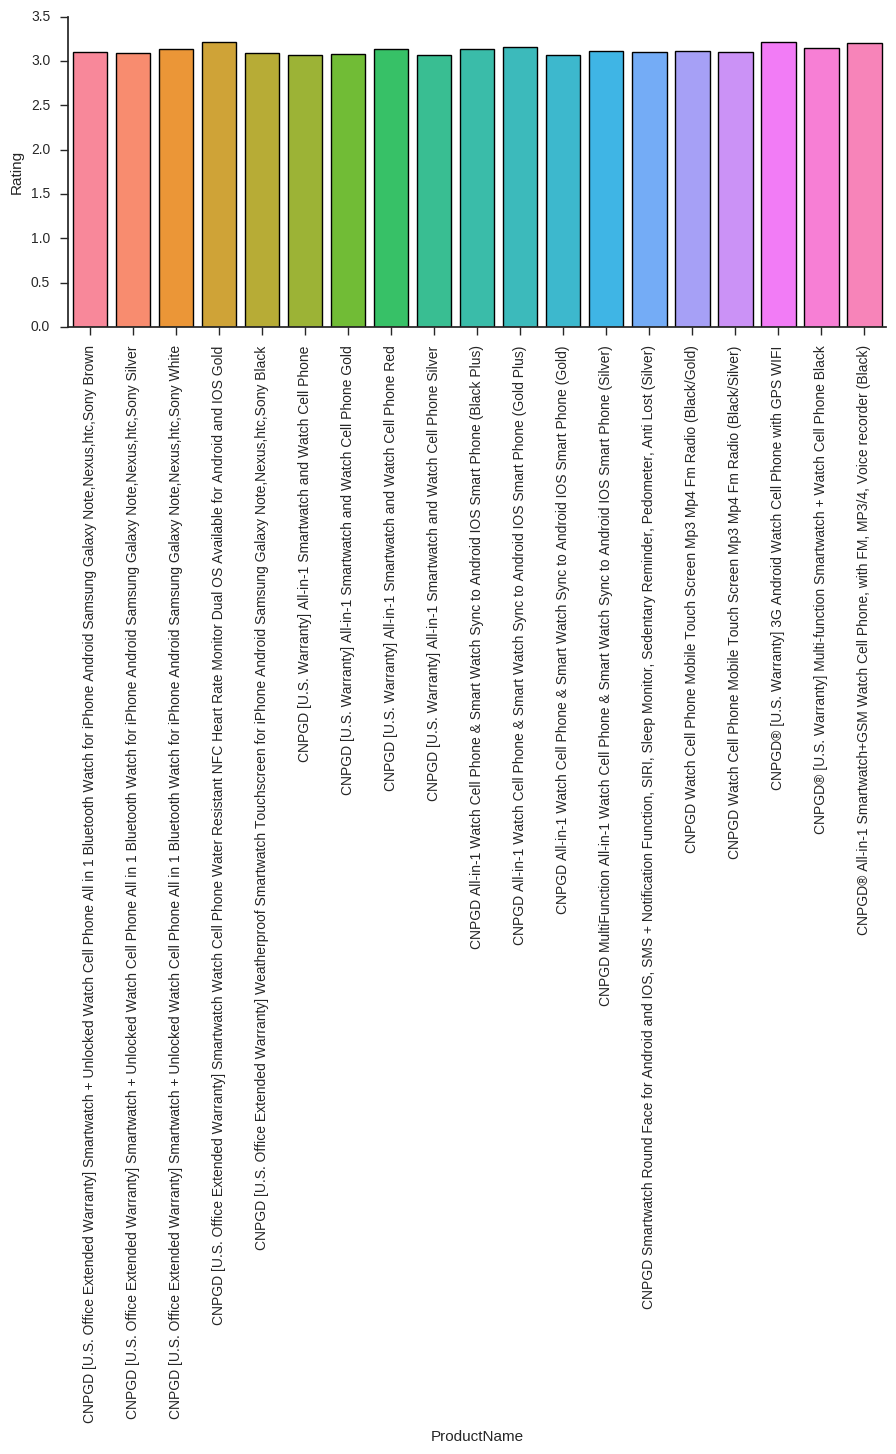

In [4]:
def plot_one_company(company, n=20):
    df_one_company = df_small.loc[df_small['BrandName'].isin([company])]
    pivot = pd.pivot_table(df_one_company,
            values = ['Rating', 'ReviewVotes'],
            index =  ['ProductName'],
                       columns= [],
                       aggfunc=[np.sum, np.mean, np.count_nonzero, np.std], 
                       margins=True, fill_value=0).sort_values(by=('count_nonzero', 'Rating'), ascending=False).fillna('')
    top_10_prods = pivot.reindex().head(n=20)
    top_10_prods = top_10_prods.reset_index()
    tt_prods = top_10_prods['ProductName']
    tt_prods2 = tt_prods.reset_index()
    top_10_prods_list = list(set(tt_prods2['ProductName']))
    #top_30_prod_list

    try:
        aa= df_one_company[df_one_company['ProductName'].isin(top_10_prods_list)]
        g = sns.factorplot(x='ProductName', 
                           y='Rating',
                           data=aa, 
                           saturation=1, 
                           kind="bar", 
                           ci=None, 
                           aspect=4, 
                           linewidth=1) 
        locs, labels = plt.xticks()
        plt.setp(labels, rotation=90)
    except: 
        pass
        
for i in top_10_brand_list:
    plot_one_company(i, 20)

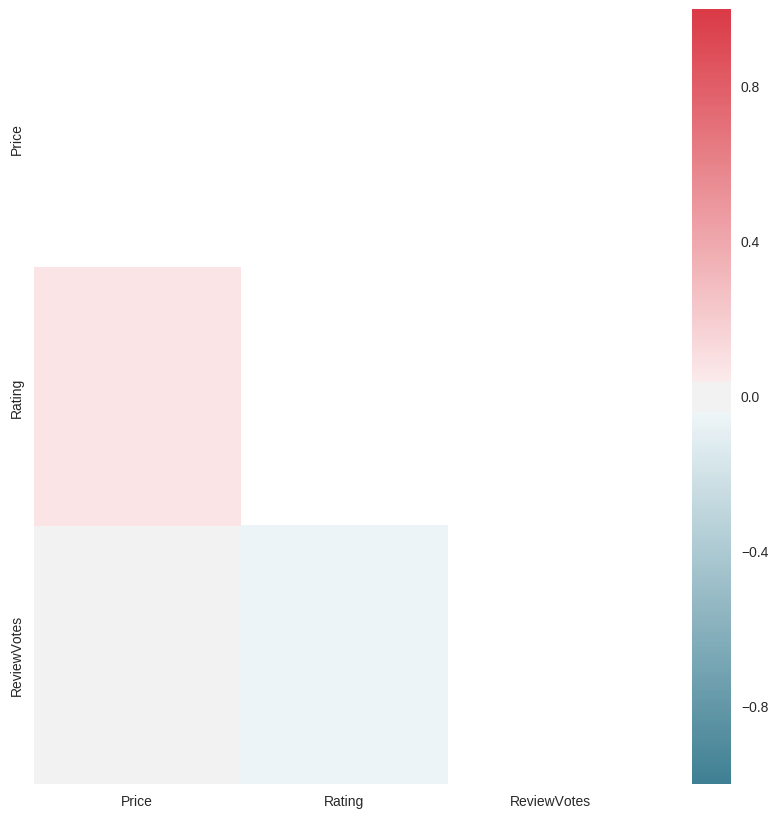

In [5]:
def heat_map(corrs_mat):
    sns.set(style="white")
    f, ax = plt.subplots(figsize=(10, 10))
    mask = np.zeros_like(corrs_mat, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True 
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corrs_mat, mask=mask, cmap=cmap, ax=ax)

variable_correlations = df.corr()
#variable_correlations
heat_map(variable_correlations)

In [6]:
df.columns.values

array(['ProductName', 'BrandName', 'Price', 'Rating', 'Reviews',
       'ReviewVotes'], dtype=object)

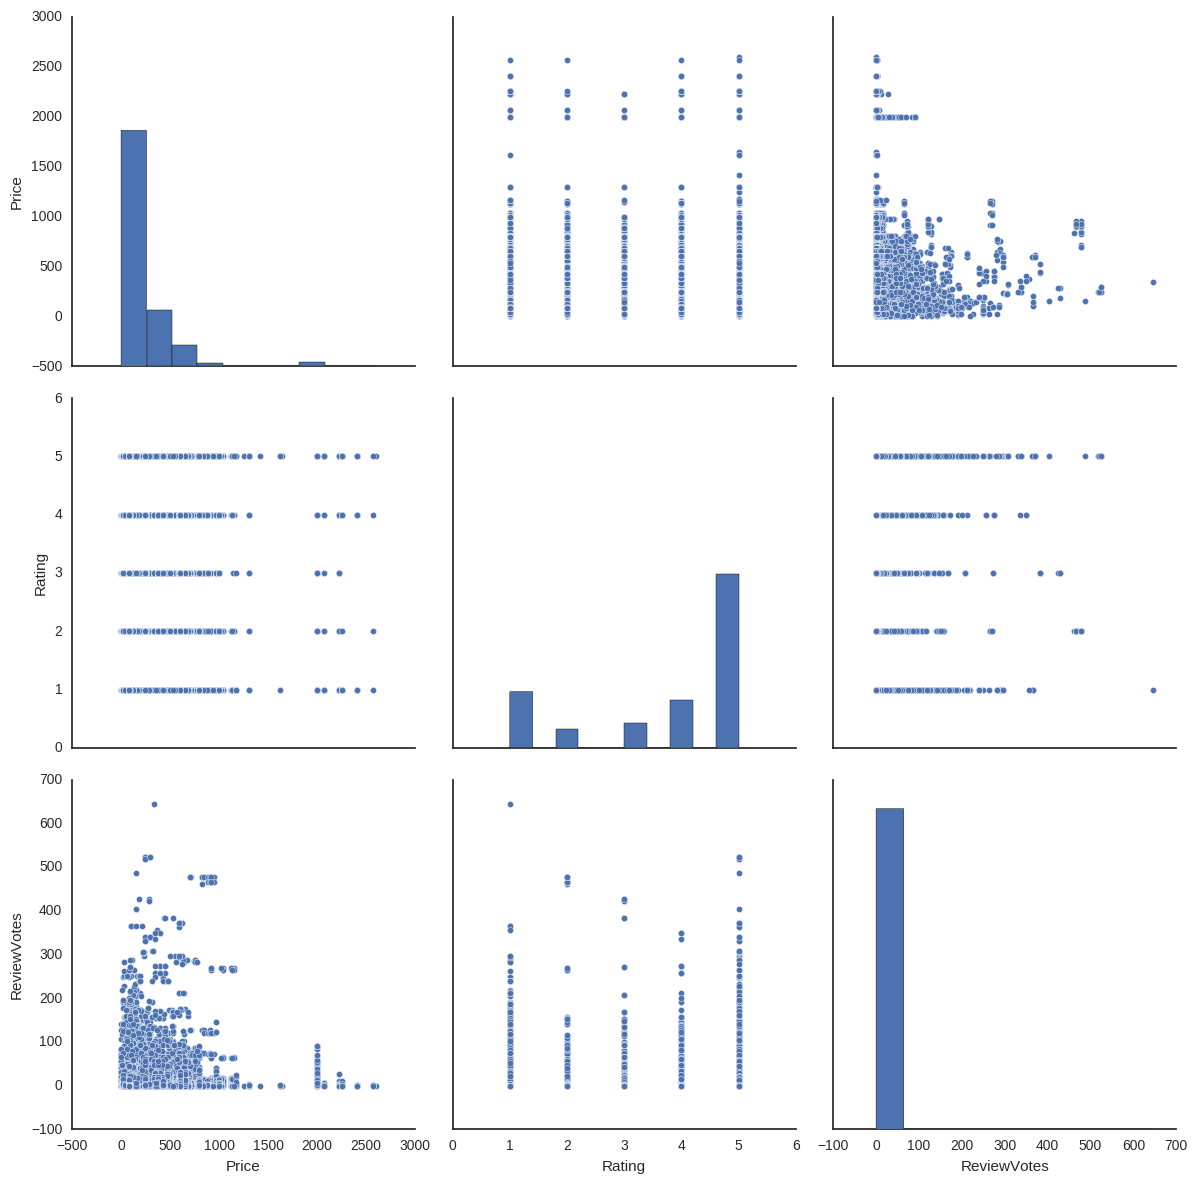

In [7]:
df_small = df[['BrandName', 
               'Price', 
               'Rating', 
               'ReviewVotes']]
sns.pairplot(df_small, size=4)

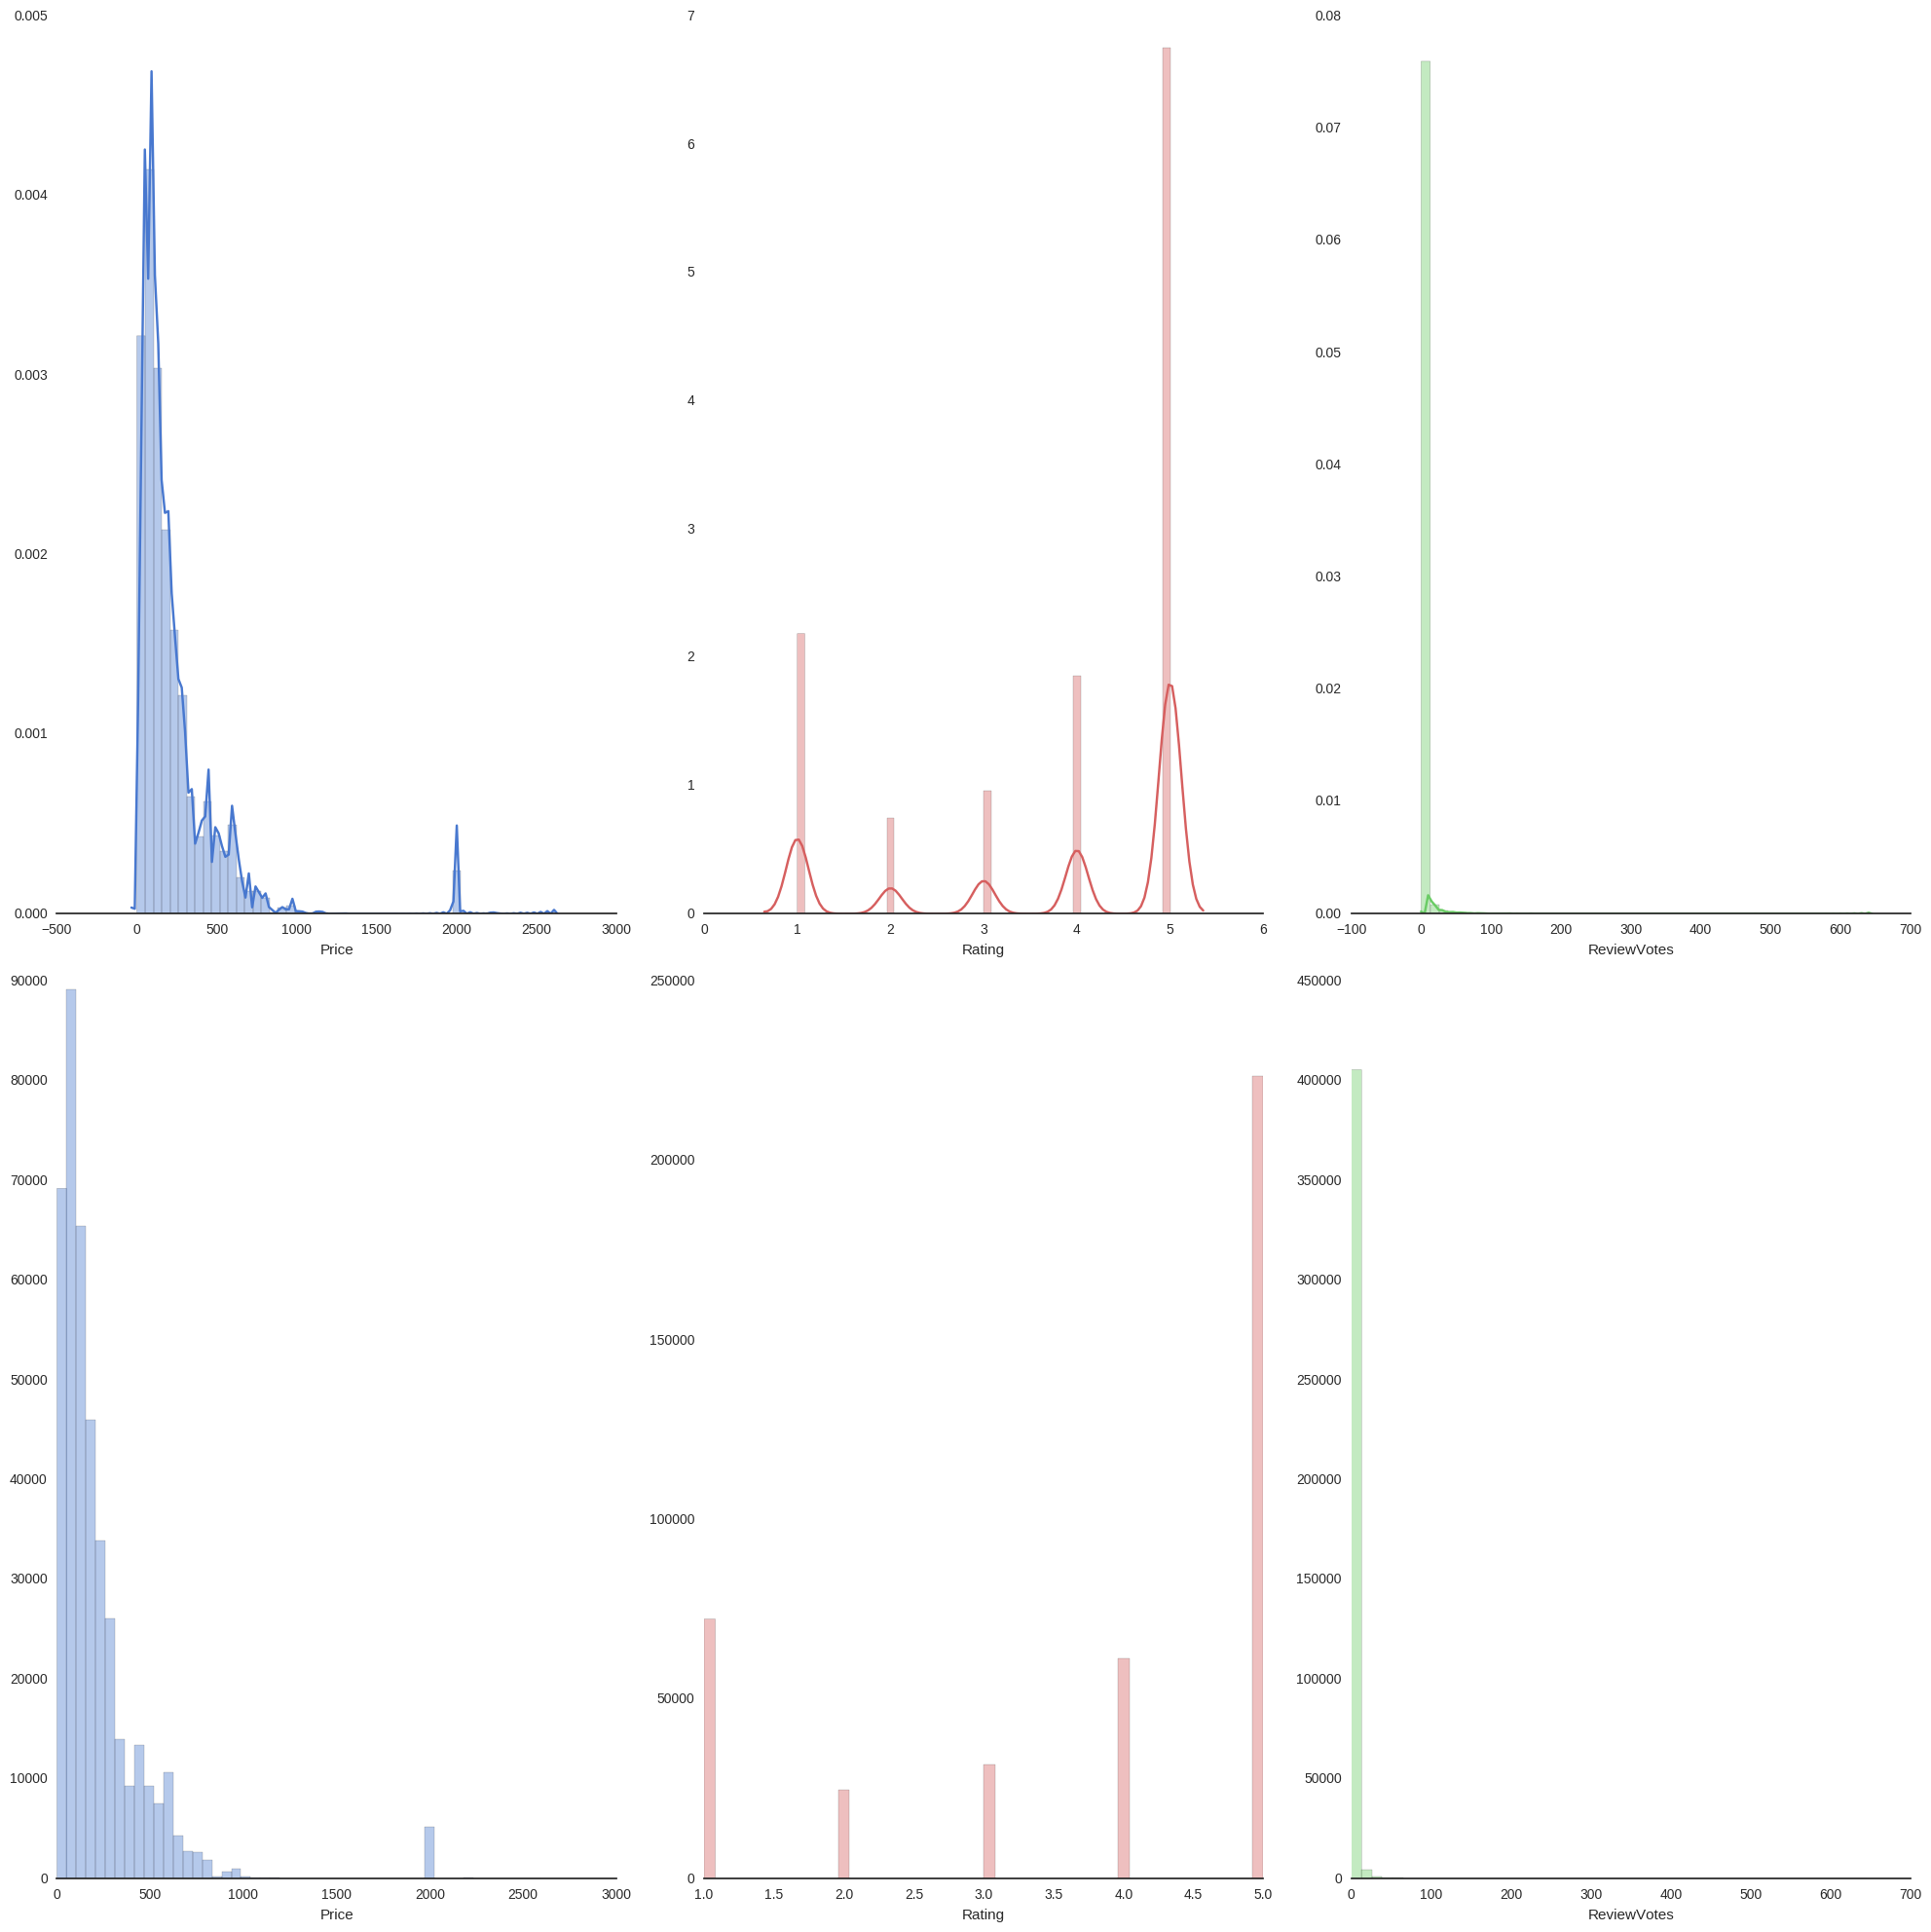

In [8]:
#data = df
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2, 3, figsize=(20,20))
sns.despine(left=True)
sns.distplot(df['Price'],            color="b", ax=axes[0, 0])
sns.distplot(df['Rating'],           color="r", ax=axes[0, 1])
sns.distplot(df['ReviewVotes'],      color="g", ax=axes[0, 2])
sns.distplot(df['Price'],            kde=False, color="b", ax=axes[1, 0])
sns.distplot(df['Rating'],           kde=False, color="r", ax=axes[1, 1])
sns.distplot(df['ReviewVotes'],      kde=False, color="g", ax=axes[1, 2])
#sns.distplot(df['hour'],                  kde=False, color="b", ax=axes[1, 2])
plt.tight_layout()

In [9]:
df_apple = df.loc[df['BrandName'].isin(['Apple'])]
pivot = pd.pivot_table(df_apple,
        values = ['Rating', 'ReviewVotes'],
        index =  ['ProductName'],
                   columns= [],
                   aggfunc=[np.sum, np.mean, np.count_nonzero], 
                   margins=True, fill_value=0).sort_values(by=('count_nonzero', 'Rating'), ascending=False).fillna('')
topmost_prods = pivot.reindex().head(n=30)
topmost_prods = topmost_prods.reset_index()
topmost_prods

ProductName  \
                                                                                          
0                                                                                   All   
1                                                  Apple iPhone 5s 32GB (Silver) - AT&T   
2                                          Apple iPhone 5s AT&T Cellphone, 16GB, Silver   
3                     Apple iPhone 4S 16GB Unlocked GSM - White (Certified Refurbished)   
4                                                    Apple iPhone 5s 32GB (Gold) - AT&T   
5                                                    Apple iPhone 4 32GB (Black) - AT&T   
6                                                Apple iPhone 4S 16GB (Black) - Verizon   
7                                      Apple iPhone 6 Plus 64GB Gold (Factory Unlocked)   
8                                   Apple iPhone 5c 8GB Unlocked GSM Smartphone - Green   
9                                       Apple iPhone 5c 8GB (Yellow) - Verizon Wireless   
10                                           Apple iPhone 5s AT&T Cellphone, 16GB, Gold   
11                                       Apple iPhone 5 Unlocked Cellphone, 32GB, White   
12                                            Apple iPhone 5c 32GB - Unlocked - (White)   
13                                                  Apple iPhone 5c 32GB (White) - AT&T   
14                         Apple iPhone 6 Plus Factory Unlocked Cellphone, 64GB, Silver   
15                    Apple iPhone 5c 8GB Unlocked GSM Smartphone w/ 8MP Camera - Green   
16                                            Apple iPhone 5c 32GB - Unlocked - (Green)   
17                                             Apple iPhone 5c 32GB - Unlocked - (Blue)   
18                                 Apple iPhone 6 Plus Unlocked Cellphone, 16GB, Silver   
19                                           Apple iPhone 5c 32GB - Unlocked - (Yellow)   
20                                                  Apple iPhone 5c 16GB (Green) - AT&T   
21                                                   Apple iPhone 4 16GB (Black) - AT&T   
22                                       Apple iPhone 5s 64GB (Gold) - Verizon Wireless   
23  Apple iPhone 5 32GB Factory Unlocked GSM Cell Phone - Black (Certified Refurbished)   
24                                    Apple iPhone 5C 16GB White - Unlocked Cell Phones   
25         Apple Smart Watch Sport 38mm - Stainless Steel/White (Certified Refurbished)   
26                         Apple iPhone 3GS 8GB Black Factory Unlocked / Not Jailbroken   
27                                 Apple iPhone 5s 32GB (Space Gray) - Verizon Wireless   
28                                                Apple iPhone 4 32GB (White) - Verizon   
29                                       Apple iPhone 5 Unlocked Cellphone, 64GB, White   

         sum                  mean             count_nonzero              
      Rating ReviewVotes    Rating ReviewVotes        Rating ReviewVotes  
0   228346.0    112280.0  3.924415    1.929674       58186.0     18388.0  
1     4460.0      1557.0  3.989267    1.392665        1118.0       238.0  
2     4267.0      1315.0  3.950926    1.217593        1080.0       211.0  
3     3631.0      1693.0  3.390289    1.580766        1071.0       337.0  
4     4020.0      1405.0  3.980198    1.391089        1010.0       232.0  
5     3665.0      1496.0  3.639523    1.485601        1007.0       136.0  
6     3152.0      1386.0  3.606407    1.585812         874.0       165.0  
7     3615.0      1244.0  4.268005    1.468713         847.0       214.0  
8     3415.0      1100.0  4.031877    1.298701         847.0       239.0  
9     3206.0       949.0  4.068528    1.204315         788.0       213.0  
10    3103.0      1023.0  3.978205    1.311538         780.0       184.0  
11    2675.0       795.0  3.805121    1.130868         703.0       160.0  
12    2776.0       896.0  4.029028    1.300435         689.0       226.0  
13    2632.0       305.0  3.987879    

In [10]:
tt_brand = topmost_prods['ProductName']
tt_brand2 = tt_brand.reset_index()
top_10_prod_list = list(set(tt_brand2['ProductName']))
top_10_prod_list

[u'Apple iPhone 5 Unlocked Cellphone, 64GB, White',
 u'Apple Smart Watch Sport 38mm - Stainless Steel/White (Certified Refurbished)',
 u'Apple iPhone 5 32GB Factory Unlocked GSM Cell Phone - Black (Certified Refurbished)',
 u'Apple iPhone 5s 32GB (Silver) - AT&T',
 u'Apple iPhone 4 32GB (Black) - AT&T',
 u'Apple iPhone 5c 8GB (Yellow) - Verizon Wireless',
 u'Apple iPhone 4 16GB (Black) - AT&T',
 u'Apple iPhone 6 Plus 64GB Gold (Factory Unlocked)',
 u'Apple iPhone 5s 32GB (Space Gray) - Verizon Wireless',
 u'Apple iPhone 5c 8GB Unlocked GSM Smartphone - Green',
 u'Apple iPhone 5 Unlocked Cellphone, 32GB, White',
 u'Apple iPhone 5s AT&T Cellphone, 16GB, Silver',
 u'Apple iPhone 3GS 8GB Black Factory Unlocked / Not Jailbroken',
 u'Apple iPhone 4S 16GB (Black) - Verizon',
 u'Apple iPhone 6 Plus Factory Unlocked Cellphone, 64GB, Silver',
 u'Apple iPhone 5c 16GB (Green) - AT&T',
 u'Apple iPhone 5s 64GB (Gold) - Verizon Wireless',
 u'Apple iPhone 5C 16GB White - Unlocked Cell Phones',
 u'Appl

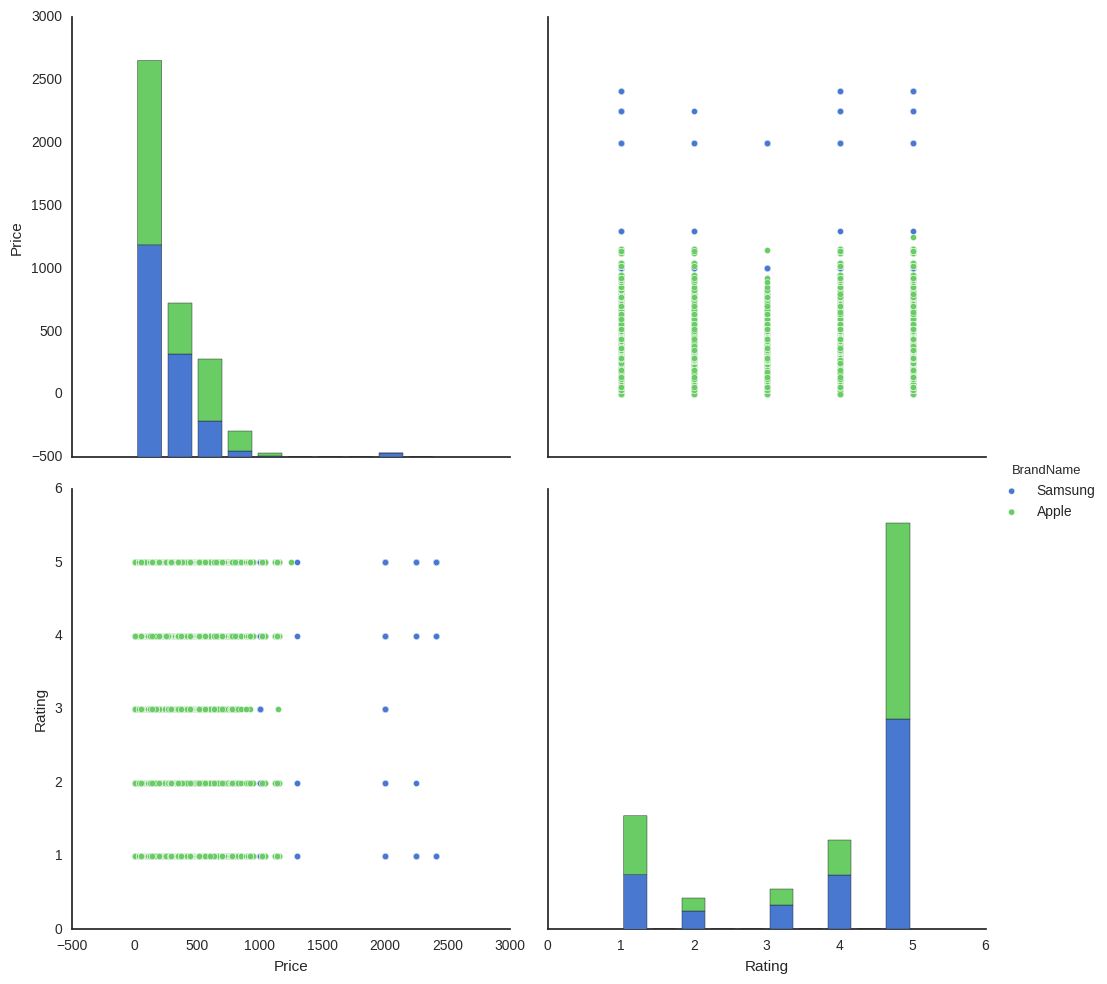

In [ ]:
apple_samsumg = ['Apple', 'Samsung']
df_top_ten = df.loc[df['BrandName'].isin(apple_samsumg)]
df_small = df_top_ten[['BrandName', 
               'Price', 
               'Rating'
              ]]
sns.pairplot(df_small, hue='BrandName', size=5)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest

def find_correlations_one_brand(company):
    df_one_company = df.loc[df['BrandName'].isin([company])]
    def corr_matrix_of_important_words(term_doc_mat, word_list, scores, n_features_to_keep):
        selector = SelectKBest(k=n_features_to_keep).fit(term_doc_mat, scores)
        informative_words_index = selector.get_support(indices=True)
        labels = [word_list[i] for i in informative_words_index]
        data = pd.DataFrame(term_doc_mat[:,informative_words_index].todense(), columns=labels)
        data['Score'] = df_one_company.Rating
        return(data.corr())

    def heat_map(corrs_mat):
        sns.set(style="white")
        f, ax = plt.subplots(figsize=(20, 20))
        mask = np.zeros_like(corrs_mat, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True 
        # Generate a custom diverging colormap
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        sns.heatmap(corrs_mat, mask=mask, cmap=cmap, ax=ax)
    vectorizer = CountVectorizer(max_features = 500, stop_words='english')
    term_doc_mat = vectorizer.fit_transform(df_one_company.Reviews.values.astype('U'))
    word_list = vectorizer.get_feature_names()

    corrs_large = corr_matrix_of_important_words(term_doc_mat, word_list, df_one_company.Rating, 60)
    #print(corrs_large.Score.sort_values(inplace=False)[:-1])
    corrs_small = corr_matrix_of_important_words(term_doc_mat, word_list, df_one_company.Rating, 15)
    heat_map(corrs_small)

for item in top_10_brand_list:
    print (item)
    find_correlations_one_brand(item)

LG


In [ ]:
def create_word_cloud(one_company):
    try: 
        df_one_company = df.loc[df['BrandName'].isin([one_company])]
        df_one_company_sample = df_one_company.sample(frac=0.05)
        word_cloud_collection = ''
        for val in df_one_company_sample.Reviews.str.lower():
            tokens = nltk.word_tokenize(val)
            tokens = [word for word in tokens if word not in stopwords.words('english')]
            for words in tokens:
                word_cloud_collection = word_cloud_collection + words + ' '
        wordcloud = WordCloud(max_font_size=50, width=500, height=500).generate(word_cloud_collection)
        plt.figure(figsize=(20,20))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()
    except: 
        pass
    
#company_list = ['Apple', 'Samsung']
for i in top_10_brand_list:
    print (i)
    create_word_cloud(i)

In [ ]:
def review_to_wordlist( review, remove_stopwords=True ):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
    # 1. Remove HTML
    review_text = BeautifulSoup(review).get_text()
    # 2. Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review)
    # 3. Convert words to lower case and split them
    words = review_text.lower().split()
    # 4. Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]

    b=[]
    stemmer = english_stemmer #PorterStemmer()
    for word in words:
        b.append(stemmer.stem(word))
    # 5. Return a list of words
    return(words)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)


    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(3)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
mod_df = df[df['Reviews'].isnull()==False]
mod_df = mod_df.sample(frac = 0.01)
train, test = train_test_split(mod_df, test_size = 0.3)

In [ ]:
clean_train_reviews = []
for review in train['Reviews']:
    clean_train_reviews.append( " ".join(review_to_wordlist(review)))
    
clean_test_reviews = []
for review in test['Reviews']:
    clean_test_reviews.append( " ".join(review_to_wordlist(review)))

In [ ]:
vectorizer = TfidfVectorizer( min_df=2, max_df=0.95, max_features = 200000, ngram_range = ( 1, 4 ),
                              sublinear_tf = True )

vectorizer = vectorizer.fit(clean_train_reviews)
train_features = vectorizer.transform(clean_train_reviews)

test_features = vectorizer.transform(clean_test_reviews)
fselect = SelectKBest(chi2 , k=10000)
train_features = fselect.fit_transform(train_features, train["Rating"])
test_features = fselect.transform(test_features)

In [ ]:
classifiers = [('RandomForestClassifierG', RandomForestClassifier(n_jobs=-1, criterion='gini')),
               ('RandomForestClassifierE', RandomForestClassifier(n_jobs=-1, criterion='entropy')),
               ('AdaBoostClassifier', AdaBoostClassifier()),
               ('ExtraTreesClassifier', ExtraTreesClassifier(n_jobs=-1)),
               ('DecisionTreeClassifier', DecisionTreeClassifier()),
               ('LogisticRegression', LogisticRegression()),
               ('MultinomialNB', MultinomialNB(alpha=0.001)), 
               ('SGDClassifier', SGDClassifier(loss='modified_huber', n_iter=5, random_state=0, shuffle=True)),
               ('GradientBoostingClassifier', GradientBoostingClassifier()),
               
              ]
allscores = []
for name, classifier in classifiers:
    scores = []
    for i in range(1): # 3 runs
        print (name)

        classifier.fit( train_features, train["Rating"] )
        pred = classifier.predict( test_features.toarray() )
        print('prediction accuracy: ', accuracy_score(test['Rating'], pred))
        cnf_matrix = confusion_matrix(test['Rating'], pred)
        plot_confusion_matrix(cnf_matrix, classes=['1','2','3','4','5'],
                      title='Confusion matrix, with normalization', normalize=True)